# Import the libraries

In [3]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pathlib import Path
import os

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import statsmodels.api as sm

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import plotly.io as pio
pio.renderers.default = "colab"

In [5]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [6]:
# Set default title color
plt.style.use('fivethirtyeight')

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# suptitle
plt.rcParams["figure.titlesize"] = 22
plt.rcParams["figure.titleweight"] = "bold"
plt.rcParams['text.color'] = '#333333'
# title
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlelocation"] = "left"
plt.rcParams['axes.titlecolor'] = '#333333'
# label
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.labelcolor'] = '#333333'
# spines
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# tick
plt.rcParams['xtick.color'] = "#333333"
plt.rcParams['ytick.color'] = "#333333"

# Data

In [8]:
df.tail()

,id_reg_nat,time,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),id_area
1091,2189,2023-11-15,17.5,0.0,10.2,293,2.20,2
1092,2190,2023-11-16,16.8,0.0,12.7,267,2.27,2
1093,2191,2023-11-17,16.5,0.0,10.5,281,2.17,2
1094,2192,2023-11-18,16.3,0.0,14.8,56,1.84,2
1095,2193,2023-11-19,16.5,0.0,8.7,327,2.20,2


In [7]:

df = pd.read_csv("algiers_nat_metrics.csv", parse_dates=['time'])
df.head()

,id_reg_nat,time,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),id_area
0,1098,2020-11-19,13.9,0.0,10.0,319,1.78,2
1,1099,2020-11-20,13.5,8.0,18.7,54,0.81,2
2,1100,2020-11-21,14.7,1.3,22.1,15,2.79,2
3,1101,2020-11-22,14.3,1.2,18.1,26,1.94,2
4,1102,2020-11-23,12.9,0.0,10.8,264,1.68,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_reg_nat                       1096 non-null   int64         
 1   time                             1096 non-null   datetime64[ns]
 2   temperature_2m_mean (°C)         1096 non-null   float64       
 3   precipitation_sum (mm)           1096 non-null   float64       
 4   wind_speed_10m_max (km/h)        1096 non-null   float64       
 5   wind_direction_10m_dominant (°)  1096 non-null   int64         
 6   et0_fao_evapotranspiration (mm)  1096 non-null   float64       
 7   id_area                          1096 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 68.6 KB


In [11]:
df.shape

(1096, 8)

In [12]:
df.columns


Index(['id_reg_nat', 'time', 'temperature_2m_mean (°C)',
       'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'id_area'],
      dtype='object')

In [13]:
df.isnull().sum()

id_reg_nat                         0
time                               0
temperature_2m_mean (°C)           0
precipitation_sum (mm)             0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
et0_fao_evapotranspiration (mm)    0
id_area                            0
dtype: int64

In [14]:
print(df['time'].min())
print(df['time'].max())

2020-11-19 00:00:00
2023-11-19 00:00:00


In [15]:
# Check columns
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical Columns: {num_cols}")
print()

cat_cols = df.select_dtypes(exclude=[np.number]).columns
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: Index(['id_reg_nat', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)',
       'et0_fao_evapotranspiration (mm)', 'id_area'],
      dtype='object')

Categorical Columns: Index(['time'], dtype='object')


 # Descriptive Statistics

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_reg_nat                       1096 non-null   int64         
 1   time                             1096 non-null   datetime64[ns]
 2   temperature_2m_mean (°C)         1096 non-null   float64       
 3   precipitation_sum (mm)           1096 non-null   float64       
 4   wind_speed_10m_max (km/h)        1096 non-null   float64       
 5   wind_direction_10m_dominant (°)  1096 non-null   int64         
 6   et0_fao_evapotranspiration (mm)  1096 non-null   float64       
 7   id_area                          1096 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 68.6 KB


In [20]:
# Check duplicates
df.duplicated().sum()

0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_reg_nat,1096.0,1645.500000,316.532252,1098.00,1371.75,1645.500,1919.250,2193.00
temperature_2m_mean (°C),1096.0,18.335766,5.838799,5.50,13.30,18.050,23.400,37.70
precipitation_sum (mm),1096.0,1.355474,3.872355,0.00,0.00,0.000,0.600,41.70
wind_speed_10m_max (km/h),1096.0,19.126186,6.530542,7.20,14.50,18.000,22.525,54.60
wind_direction_10m_dominant (°),1096.0,162.761861,117.926069,1.00,47.00,177.000,269.000,360.00
et0_fao_evapotranspiration (mm),1096.0,3.481432,1.558640,0.57,2.14,3.425,4.750,9.09
id_area,1096.0,2.000000,0.000000,2.00,2.00,2.000,2.000,2.00


In [18]:
# Drop 'id_area' and 'id_reg_nat'
df.drop(['id_area', 'id_reg_nat'], inplace=True, axis=1)

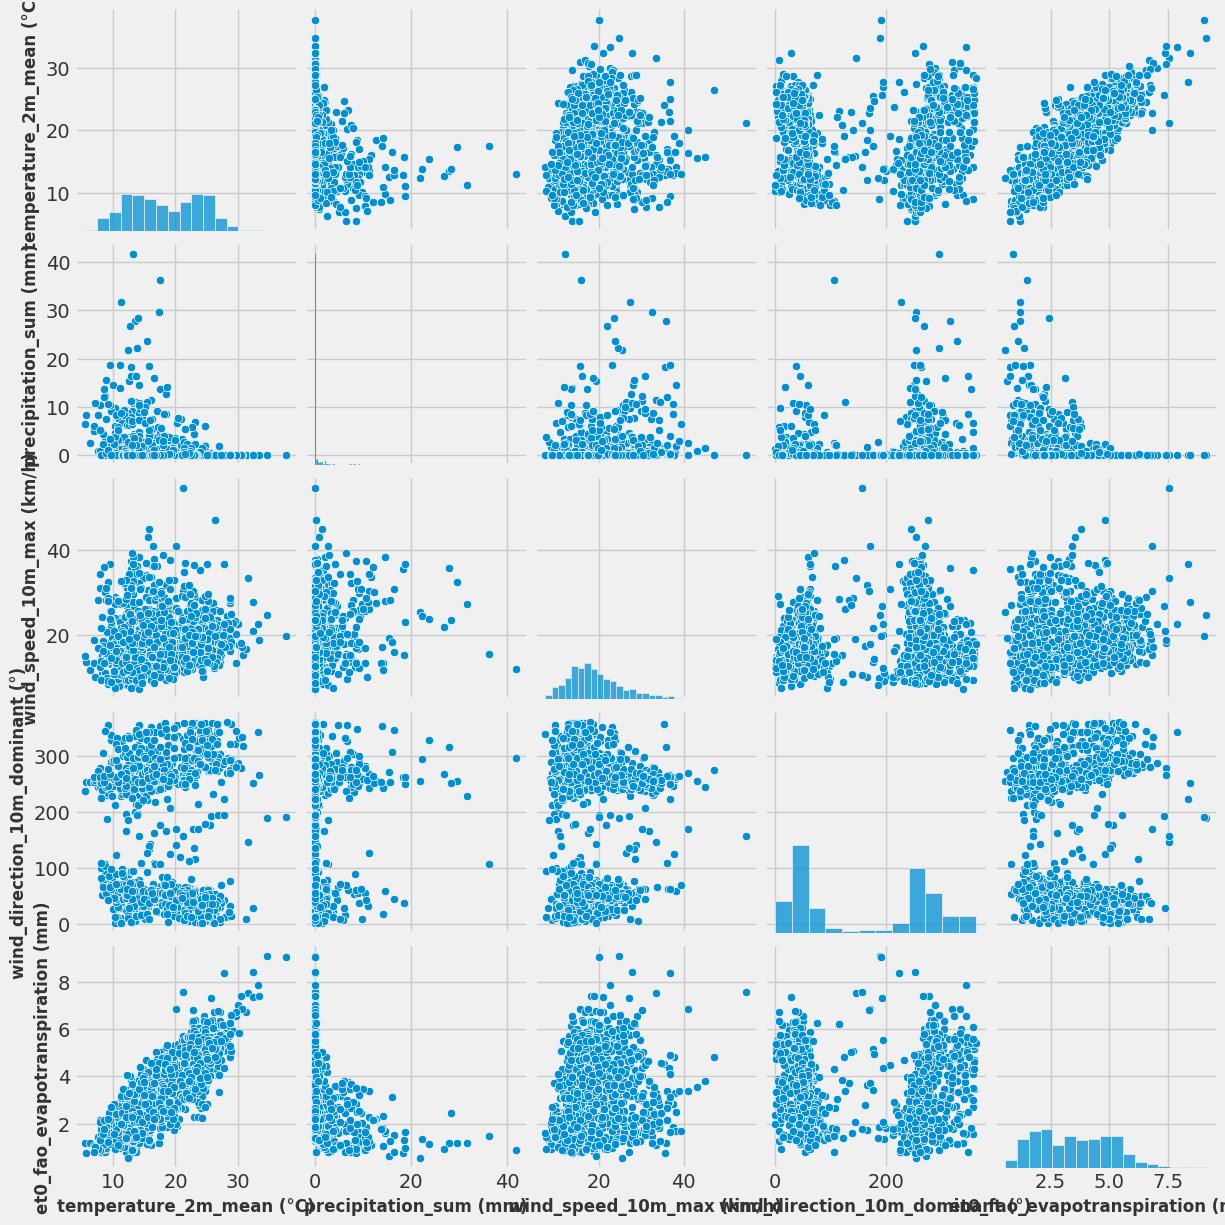

In [19]:
# Check distribution and bivariate
sns.pairplot(df);

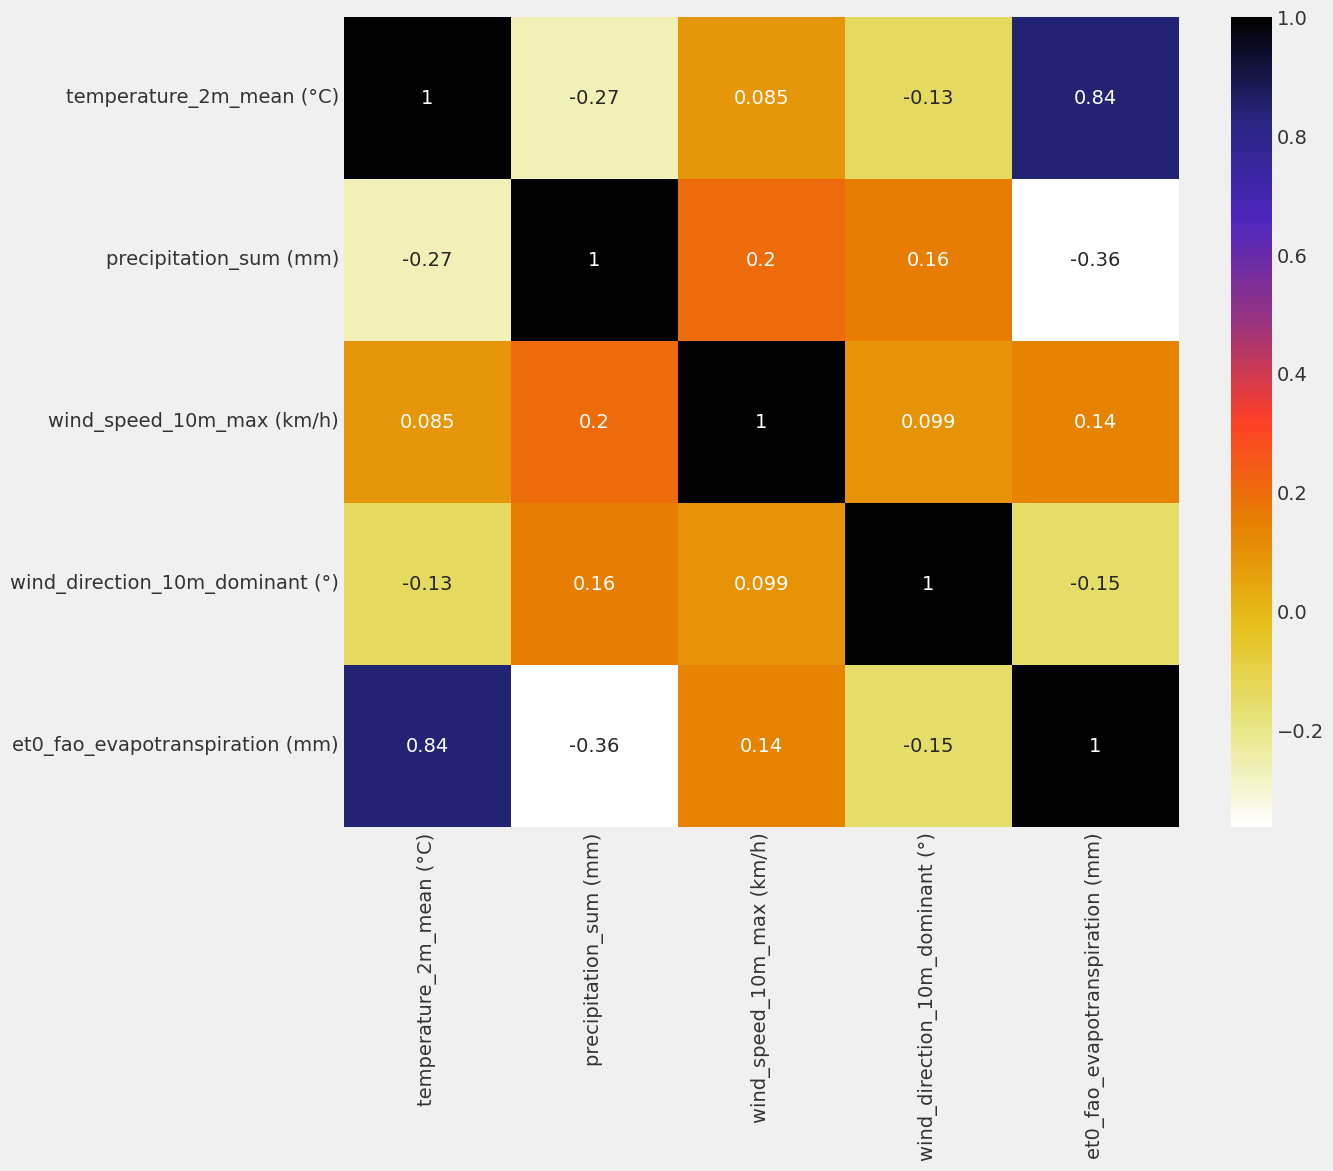

In [21]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor =df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

**Exploratory Data Analysis**
* **Univariate Analysis**
* Plots show seasonality, so statistical tests need to be conducted to check stationality

Algeria officially the People's Democratic Republic of Algeria, is a country in North Africa. It is the tenth largest country in the world, and the largest country in Africa It is part of the Maghreb region of Northwest Africa.
Algeria experiences two distinct climates: a Mediterranean climate in northern Algeria and a desert climate in the majority of the country. The sub-humid Mediterranean climate on the coast and in the Tell Atlas Mountains is characterized by wet and mild winters and hot and dry summers. The rest of the country is covered by the Sahara Desert, where the seasonal average winter temperature is 15°C to 28°C and 40°C to 45°C during the summer. In the north, moist winds from the sea bring rain from autumn to spring. Algeria's climate is also influenced by Sirocco winds, which cause increased temperature with dusty, dry conditions and storms in the Mediterranean Sea. Key historical climate trends include:

Temperature

Annual mean temperatures have risen across Algeria since the 1960's.
Inter-annual and decadal variability at the nearest available station show a warming of about 2.7°C per century since the 1900's.
Precipitation

Variability in rainfall is high.
The seasonal average station, decadal variability and linear trend indicate a reduction of 12.4 mm/month per century since 1960's.

In [22]:
# Assuming you have a DataFrame 'df'
fig = px.line(df, x="time", y='precipitation_sum (mm)', title='Sum of Daily Precipitation (mm)')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,)

fig.show()

In [23]:
# Assuming you have a DataFrame 'df'
fig = px.line(df, x="time", y="temperature_2m_mean (°C)", title='Mean Air Temperature at 2m above Ground (°C )')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
)

fig.show(renderer="colab")

In [24]:
# Assuming you have a DataFrame 'df'
fig = px.line(df, x="time", y='wind_speed_10m_max (km/h)', title='Maximum Wind Speed on a Day (kmh)')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
)

fig.show(renderer="colab")

In [25]:
# Assuming you have a DataFrame 'df'
fig = px.line(df, x="time", y='wind_direction_10m_dominant (°)', title='Dominant Wind Direction (°)')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
)

fig.show(renderer="colab")

In [27]:
# Assuming you have a DataFrame 'df'
fig = px.line(df, x="time", y='et0_fao_evapotranspiration (mm)', title='Daily Sum of ET₀ Reference Evapotranspiration of a Well Watered Grass Field (mm)')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
)

fig.show(renderer="colab")

In [28]:
# Create features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['year_month'] = df['time'].dt.strftime('%Y_%m')
df['year_week'] = df['time'].dt.strftime('%Y_%U')
df['season'] = ['wet season' if m in [5, 6, 7, 8, 9, 10] else 'dry season' for m in df['time'].dt.month]

In [29]:
df.head()

,time,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),year,month,year_month,year_week,season
0,2020-11-19,13.9,0.0,10.0,319,1.78,2020,11,2020_11,2020_46,dry season
1,2020-11-20,13.5,8.0,18.7,54,0.81,2020,11,2020_11,2020_46,dry season
2,2020-11-21,14.7,1.3,22.1,15,2.79,2020,11,2020_11,2020_46,dry season
3,2020-11-22,14.3,1.2,18.1,26,1.94,2020,11,2020_11,2020_47,dry season
4,2020-11-23,12.9,0.0,10.8,264,1.68,2020,11,2020_11,2020_47,dry season


In [30]:
# Mean by weekly, monthly, yearly
weekly_avg = df.groupby('year_week')[['temperature_2m_mean (°C)',
                                   'precipitation_sum (mm)',
                                   'wind_speed_10m_max (km/h)',
                                   'wind_direction_10m_dominant (°)',
                                   'et0_fao_evapotranspiration (mm)']].mean()

monthly_avg = df.groupby('year_month')[['temperature_2m_mean (°C)',
                                   'precipitation_sum (mm)',
                                   'wind_speed_10m_max (km/h)',
                                   'wind_direction_10m_dominant (°)',
                                   'et0_fao_evapotranspiration (mm)']].mean()

yearly_avg = df.groupby('year')[[ 'temperature_2m_mean (°C)',
                                   'precipitation_sum (mm)',
                                   'wind_speed_10m_max (km/h)',
                                   'wind_direction_10m_dominant (°)',
                                   'et0_fao_evapotranspiration (mm)']].mean()

# Aggregated month total
monthly_precip_sum = df.groupby('month')['precipitation_sum (mm)'].agg(['mean', 'sum'])

yearly_precip_sum = df.groupby('year')['precipitation_sum (mm)'].sum()

seasonal_precip_sum = df.groupby('season')['precipitation_sum (mm)'].agg(['mean', 'sum'])

In [32]:
# Weekly average
cols = ['temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)']
subtitles = ('temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)')
c = 5
fig = make_subplots(rows=r, cols=c, subplot_titles=subtitles)

# Add traces
for i in range(len(cols)):
    fig.add_trace(go.Scatter(x=weekly_avg.index, y=weekly_avg[cols[i]], mode='lines'), row=1, col=i+1)

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1500,
    height=300,
)

fig.update_layout(title='<b>Weekly Average</b>', title_font=dict(size=24))

fig.show(renderer="colab")

In [33]:
# Monthly average
cols = ['temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)']
subtitles = ('temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)')
r = 1
c = 5
fig = make_subplots(rows=r, cols=c, subplot_titles=subtitles)

# Add traces
for i in range(len(cols)):
    fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg[cols[i]], mode="lines"), row=1, col=i+1)

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1500,
    height=300,
)

fig.update_layout(title='<b>Monthly Average</b>', title_font=dict(size=24))

fig.show(renderer="colab")

In [34]:
# Yearly average
cols = ['temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)']
subtitles = ('temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)')
r = 1
c = 5
fig = make_subplots(rows=r, cols=c, subplot_titles=subtitles)

# Add traces
for i in range(len(cols)):
    fig.add_trace(go.Bar(x=yearly_avg.index, y=yearly_avg[cols[i]]), row=1, col=i+1)

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1500,
    height=300,
)

fig.update_layout(title='<b>Yearly Average</b>', title_font=dict(size=24))

fig.show(renderer="colab")

In [35]:
# Yearly total precipitation
fig = go.Figure(
    data=[go.Bar(x=yearly_precip_sum.index, y=yearly_precip_sum.values)],
    layout_title_text="Precipitation Total by Year"
)
# Specify the figure size
fig.update_layout(
    autosize=False,
    width=600,
    height=300)

fig.show(width=600, height=300,renderer="colab")

In [37]:
# Month total precipitation
fig = go.Figure(
    data=[go.Bar(x=monthly_precip_sum.index, y=monthly_precip_sum['mean'])],
    layout_title_text="Average Precipitation by Month"
)
# Specify the figure size
fig.update_layout(
    autosize=False,
    width=600,
    height=300)

fig.show(width=600, height=300, renderer="colab")

In [39]:
# Average precipitation by season
fig = go.Figure(
    data=[go.Bar(x=seasonal_precip_sum .index, y=seasonal_precip_sum ['mean'])],
    layout_title_text="Average Precipitation by Season"
)
# Specify the figure size
fig.update_layout(
    autosize=False,
    width=600,
    height=300)

fig.show(renderer="colab")

* **Bivariate & Multivariate Analysis**
* 'temperature_2m_mean', 'wind_speed_10m_max', 'precipitation_sum', and 'et0_fao_evapotranspiration' show seasonality pattern
*  Especially, 'temperature_2m_mean', 'wind_speed_10m_max' and 'et0_fao_evapotranspiration'have the similarity where the both starts decreasing  from January and increasing from June.

In [40]:
# Check the pattern of features
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
cols = ['temperature_2m_mean (°C)','precipitation_sum (mm)', 'wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)','et0_fao_evapotranspiration (mm)']
df_scaled = scale.fit_transform(df[cols])

In [41]:
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df['time'])
df_scaled.head()

,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
time,,,,,
2020-11-19,0.260870,0.000000,0.059072,0.885794,0.142019
2020-11-20,0.248447,0.191847,0.242616,0.147632,0.028169
2020-11-21,0.285714,0.031175,0.314346,0.038997,0.260563
2020-11-22,0.273292,0.028777,0.229958,0.069638,0.160798
2020-11-23,0.229814,0.000000,0.075949,0.732591,0.130282


In [42]:
# Scale 5 features and check the seasonality patterns
data=[]
for col in cols:
    line = go.Scatter(x=df_scaled.index, y=df_scaled[col], mode='lines', name=col)
    data.append(line)

# Create a layout
layout = go.Layout(title='Temperature, Precipitaion, Wind speed, Wind Direction, Evapotranspiration in Bhopal, India', width=1200, height=300)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [43]:
# Visualize the wind speed and direction
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=df["wind_speed_10m_max (km/h)"],
    theta=df["wind_direction_10m_dominant (°)"],
    name='Wind Speed',
    marker_color='rgb(51,119,255)',
    marker_line_color='rgb(51,119,255)',
    marker_line_width=5))

fig.update_layout(
    title='Wind Direction Distribution',
    width=400,
    height=400,
    font_size=16,
    legend_font_size=16,
    polar_radialaxis_ticksuffix='kph',
    polar_angularaxis_rotation=0,)

fig.show(renderer="colab")

In [46]:
fig = px.scatter(df, x='precipitation_sum (mm)', y='wind_speed_10m_max (km/h)', color='month', size='et0_fao_evapotranspiration (mm)')
fig.show(renderer="colab")

# **Correlation Matrix**
* Check colliniality between features
* 'temperature_2m_mean' and 'et0_fao_evapotranspiration' are relatively high correlation

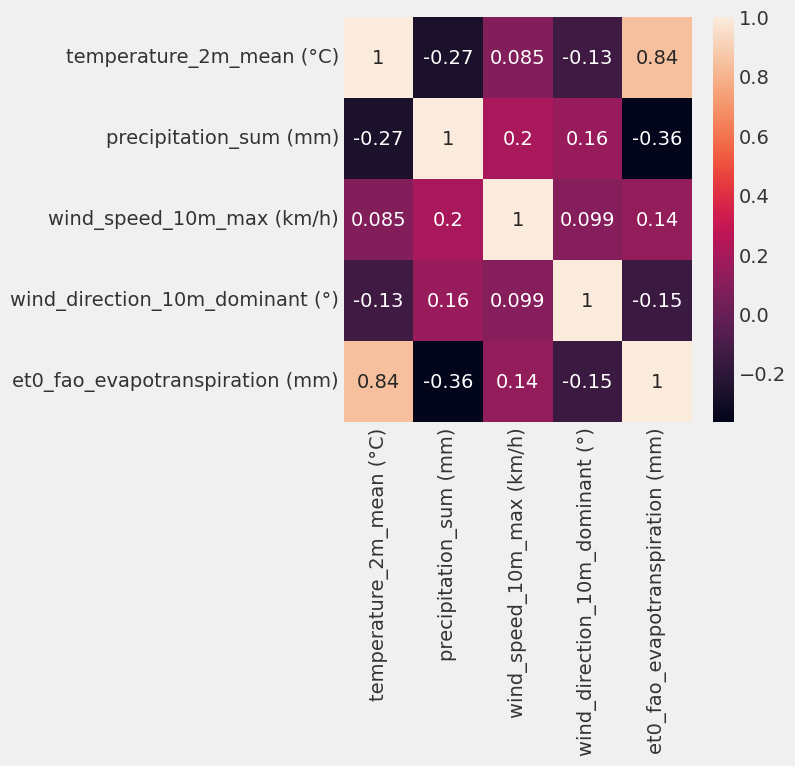

In [47]:
fig = plt.figure(figsize=(5, 5))
correlation = df[cols].corr()
sns.heatmap(correlation, annot=True);

# **Statistical Tests**
* Some time series algorighms such as ARIMA, SARIMA, or VAR require the series to be stational
* Our data shows distinctive seasonal pattern, thus it needs to check the stationality
* We will check stationality using both visual and statistical test
* Even the plot shows the seasonality, it looks consistent, thus 'precipitation_sum' is detected as stational
## **Seasonal Decomposition Plot**
## **Augmented Dickey_Fuller Test**
* The ADF test was conducted to all 5 features.
* The p-value of the test result against 'temperature_2m_mean' was greater than 0.05, thus 'temperature_2m_mean' was not statinal
* 'precipitation_sum', 'wind_speed_10m_max', 'wind_direction_10m_dominant', and 'et0_fao_evapotranspiration' were stational
    * Null Hypothesis: 'precipitation_sum' is not stational
    * Alternative Hypothesis: 'precipitation_sum' is stational
## **Grander's Causality Test**
* Grander's Causality Tests is used to determine whether one time series is causal to another time series
* Granger's Causality test results indicate the causality relation exists shown as below:
* wind_speed_10m_max --> temperature_2m_mean, precipitation_sum
* wind_direction_10m_dominant --> precipitation_sum, wind_speed_10m_max
* et0_fao_evapotranspiration --> wind_speed_10m_max, wind_direction_10m_dominant, precipitation_sum

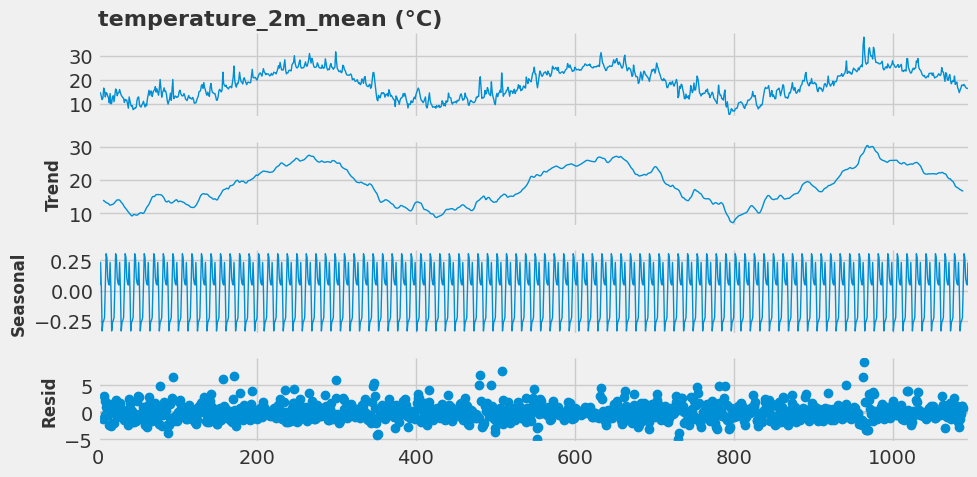

In [49]:
# Seasonal decomposition plot
decomposition = sm.tsa.seasonal_decompose(df["temperature_2m_mean (°C)"], model='additive', period=12)
# Change the line width
fig = decomposition.plot()
for ax in fig.axes:
    for line in ax.get_lines():
        line.set_linewidth(1)

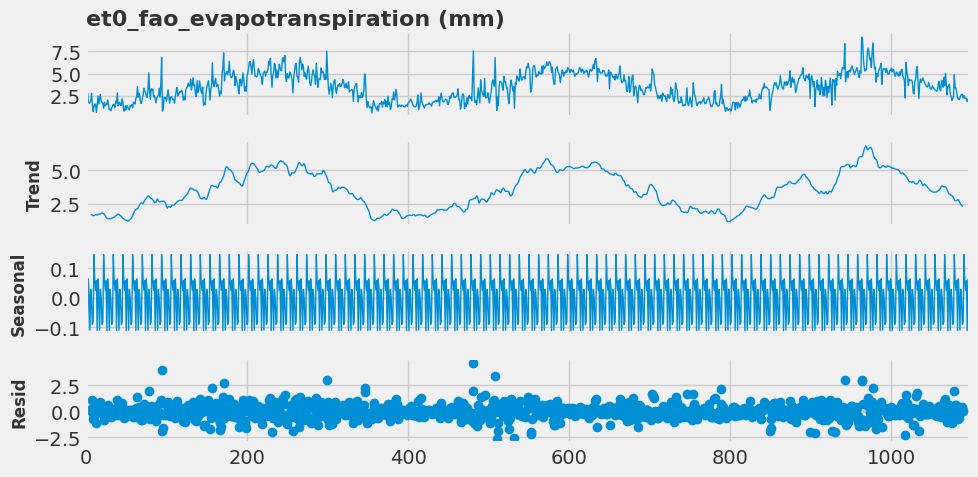

In [50]:
# Seasonal decomposition plot
decomposition = sm.tsa.seasonal_decompose(df['et0_fao_evapotranspiration (mm)'], model='additive', period=12)
# Change the line width
fig = decomposition.plot()
for ax in fig.axes:
    for line in ax.get_lines():
        line.set_linewidth(1)

## **Augumented Dickey Fuller Test**
* The test result indicates 'temperature_2m_mean' is not stational.
* When 'temperature_2m_mean' is predicted using ARIMA, SARIMA, VAR and other algorighms that has a stationarity assumption, it has to be transformed until it becomes stational.

In [51]:
# Function to print the ADF result
def adf(ts):
    # Conduct Augmented Dickey_Fuller Test
    adf_result = adfuller(ts)
    # Print the ADF test results
    print(col)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: : {adf_result[1]}")
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value}")

    if adf_result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is NOT stationary")
    print()

In [52]:
# Run the ADF test for all features
for col in cols:
    adf(df[col])

temperature_2m_mean (°C)
ADF Statistic: -1.9210539972968694
p-value: : 0.32222238197991304
Critical Values:
	1%: -3.436402509014354
	5%: -2.8642124318084456
	10%: -2.568192893555997
The series is NOT stationary

precipitation_sum (mm)
ADF Statistic: -4.970207086853926
p-value: : 2.5412015399978e-05
Critical Values:
	1%: -3.4364476591811033
	5%: -2.864232347211692
	10%: -2.5682035004867494
The series is stationary

wind_speed_10m_max (km/h)
ADF Statistic: -16.410968541149444
p-value: : 2.583880306891393e-29
Critical Values:
	1%: -3.436341508283391
	5%: -2.864185524365606
	10%: -2.5681785627437677
The series is stationary

wind_direction_10m_dominant (°)
ADF Statistic: -6.436650505330467
p-value: : 1.6465081592619953e-08
Critical Values:
	1%: -3.436402509014354
	5%: -2.8642124318084456
	10%: -2.568192893555997
The series is stationary

et0_fao_evapotranspiration (mm)
ADF Statistic: -2.4209523930761194
p-value: : 0.1359098613978536
Critical Values:
	1%: -3.436402509014354
	5%: -2.86421243

## **Granger Causality Test**
* Check a variable is causal to the other variable
* Granger's Causality test results indicate the causality relation exists shown as below:
* wind_speed_10m_max --> temperature_2m_mean, precipitation_sum
* wind_direction_10m_dominant --> precipitation_sum, wind_speed_10m_max
* et0_fao_evapotranspiration --> wind_speed_10m_max, wind_direction_10m_dominant, precipitation_sum

In [54]:
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols)):
        # granger(df[cols[i]], df[cols[j]])
        print(f"Testing causality for: {cols[i]} -> {cols[j]}")
        granger_test_result = grangercausalitytests(df[[cols[i], cols[j]]], maxlag=1)

Testing causality for: temperature_2m_mean (°C) -> precipitation_sum (mm)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2375  , p=0.0223  , df_denom=1092, df_num=1
ssr based chi2 test:   chi2=5.2519  , p=0.0219  , df=1
likelihood ratio test: chi2=5.2393  , p=0.0221  , df=1
parameter F test:         F=5.2375  , p=0.0223  , df_denom=1092, df_num=1
Testing causality for: temperature_2m_mean (°C) -> wind_speed_10m_max (km/h)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=52.3279 , p=0.0000  , df_denom=1092, df_num=1
ssr based chi2 test:   chi2=52.4716 , p=0.0000  , df=1
likelihood ratio test: chi2=51.2532 , p=0.0000  , df=1
parameter F test:         F=52.3279 , p=0.0000  , df_denom=1092, df_num=1
Testing causality for: temperature_2m_mean (°C) -> wind_direction_10m_dominant (°)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=67.1009 , p=0.0000  , df_denom=1092, df_num=1
ssr based chi2 test:   chi2=67.2853 , 

# **Insights**
* When 'temperature_2m_mean' is predicted using ARIMA, SARIMA, VAR and other algorighms that has a stationarity assumption, it has to be transformed until it becomes stational.
* Granger's Causality test results indicate the causality relation exists shown as below:
* wind_speed_10m_max --> temperature_2m_mean, precipitation_sum
* wind_direction_10m_dominant --> precipitation_sum, wind_speed_10m_max
* et0_fao_evapotranspiration --> wind_speed_10m_max, wind_direction_10m_dominant, precipitation_sum
* When a multivariate time series algorithm is used, these combination of variables can be used.